<a href="https://colab.research.google.com/github/bayu1707/DAA/blob/main/Tugas_Pemvis_p_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

c


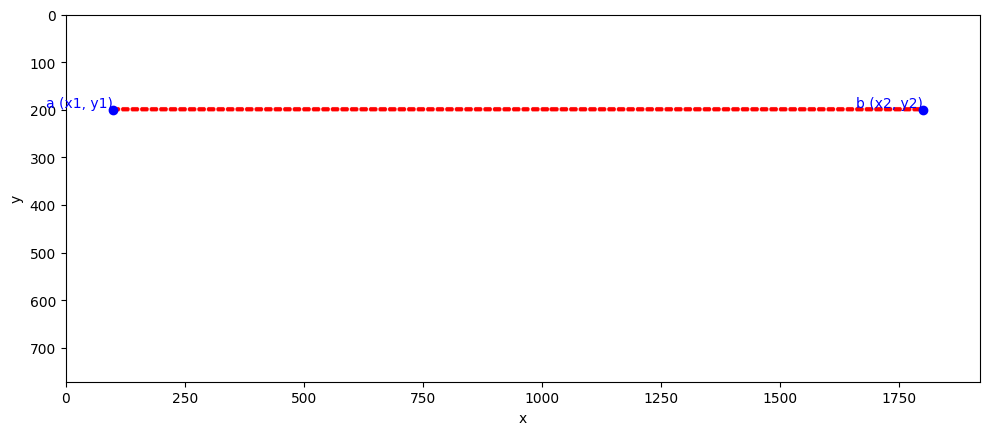

In [1]:
#LOW LEVEL CODING FOR CREATING POINTS
print("\033c") #To close all
import numpy as np
import matplotlib.pyplot as plt

#The user informs the coordinates of the two points for the line.
# Mengubah kode sebelumnya untuk mengikuti format gambar yang diunggah pengguna:
# - Garis putus-putus merah dengan titik ujung biru.
# - Garis koordinat (x dan y) harus ditampilkan.
# - Titik a dan b harus ditandai dengan warna biru.

# Kembali mengatur variabel yang dibutuhkan
x1, y1 = 100, 200
x2, y2 = 1800, 200
lw = 10  # Lebar garis
hw = lw // 2  # Setengah lebar garis

# Ukuran kanvas
row = int(5/7 * 1080)
col = int(1 * 1920)

# Membuat kanvas putih
# First, we need to calculate the gradient 'my'
my = (y2 - y1) / (x2 - x1)

# Then we'll recreate the canvas
Gambar = np.ones(shape=(row, col, 3), dtype=np.uint8) * 255

# Fungsi untuk menggambar titik dengan warna tertentu
def draw_point(x, y, hw, Gambar, color):
    for i in range(max(0, x-hw), min(col, x+hw)):
        for j in range(max(0, y-hw), min(row, y+hw)):
            if ((i-x)**2 + (j-y)**2) < hw**2:
                Gambar[j, i] = color

# Redefine draw_dotted_line function to include my calculation inside
def draw_dotted_line(x1, y1, x2, y2, hw, Gambar, color, dash_length=20):
    my = (y2 - y1) / (x2 - x1)  # Gradient calculation
    dx = x2 - x1
    dy = y2 - y1
    dist = np.sqrt(dx**2 + dy**2)
    dashes = int(dist / dash_length)
    for dash in range(dashes):
        start = dash / dashes
        end = (dash + 0.5) / dashes
        x_start = int(x1 + start * dx)
        x_end = int(x1 + end * dx)
        y_start = int(y1 + start * dy)
        y_end = int(y1 + end * dy)
        for x in range(x_start, x_end):
            y = int(my * (x - x1) + y1)
            if 0 <= x < col and 0 <= y < row:  # Ensure that the points are within the canvas
                draw_point(x, y, hw, Gambar, color)

# Now draw everything again
draw_dotted_line(x1, y1, x2, y2, hw, Gambar, color=[255, 0, 0])
draw_point(x1, y1, hw, Gambar, color=[0, 0, 255])
draw_point(x2, y2, hw, Gambar, color=[0, 0, 255])

# Create a new plot with the sumbu koordinat
plt.figure(figsize=(10, 6))
plt.imshow(Gambar)
plt.xlim(0, col)
plt.ylim(row, 0)  # Flip the y-axis to match typical Cartesian coordinate system
plt.xlabel('x')
plt.ylabel('y')
plt.scatter([x1, x2], [y1, y2], c='blue')  # Mark points a and b
plt.text(x1, y1, 'a (x1, y1)', color='blue', verticalalignment='bottom', horizontalalignment='right')
plt.text(x2, y2, 'b (x2, y2)', color='blue', verticalalignment='bottom', horizontalalignment='right')
plt.tight_layout()
plt.show()

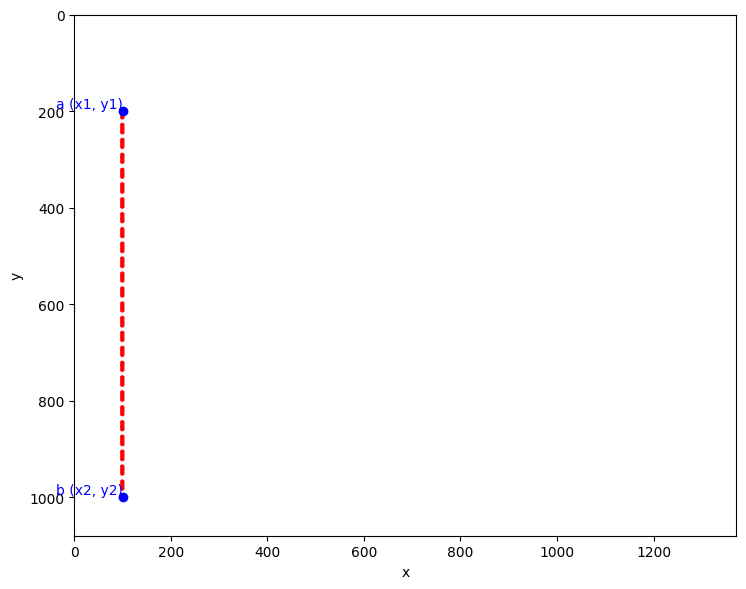

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Mengatur titik a dan b
x1, y1 = 100, 200
x2, y2 = 100, 1000
lw = 10  # Lebar garis
hw = lw // 2  # Setengah lebar garis

# Ukuran kanvas
row = int(1 * 1080)
col = int(5/7 * 1920)

# Membuat kanvas putih
Gambar = np.ones(shape=(row, col, 3), dtype=np.uint8) * 255

# Fungsi untuk menggambar titik dengan warna tertentu
def draw_point(x, y, hw, Gambar, color):
    for i in range(max(0, x-hw), min(col, x+hw)):
        for j in range(max(0, y-hw), min(row, y+hw)):
            if ((i-x)**2 + (j-y)**2) < hw**2:
                Gambar[j, i] = color

# Fungsi untuk menggambar garis putus-putus menggunakan SPL-2
def draw_dashed_spl2_line(x1, y1, x2, y2, hw, Gambar, color, dash_length=20):
    if x2 - x1 != 0:  # Handle case for non-vertical lines
        mx = (y2 - y1) / (x2 - x1)  # Gradient calculation
        x_delta = x2 - x1
        dist = np.sqrt(x_delta**2 + (y2 - y1)**2)
        dashes = int(dist / dash_length)
        for dash in range(dashes):
            start = dash / dashes
            end = (dash + 0.5) / dashes
            x_start = int(x1 + start * x_delta)
            x_end = int(x1 + end * x_delta)
            y_start = int(mx * (x_start - x1) + y1)
            y_end = int(mx * (x_end - x1) + y1)
            for x in range(x_start, x_end):
                y = int(mx * (x - x1) + y1)
                if 0 <= x < col and 0 <= y < row:  # Ensure that the points are within the canvas
                    draw_point(x, y, hw, Gambar, color)
    else:  # Handle case for vertical lines
        dist = abs(y2 - y1)
        dashes = int(dist / dash_length)
        for dash in range(dashes):
            start = dash / dashes
            end = (dash + 0.5) / dashes
            y_start = int(y1 + start * (y2 - y1))
            y_end = int(y1 + end * (y2 - y1))
            for y in range(y_start, y_end):
                if 0 <= x1 < col and 0 <= y < row:  # Ensure that the points are within the canvas
                    draw_point(x1, y, hw, Gambar, color)

# Gambar garis putus-putus menggunakan fungsi baru
draw_dashed_spl2_line(x1, y1, x2, y2, hw, Gambar, color=[255, 0, 0], dash_length=30)

# Gambar titik a dan b
draw_point(x1, y1, hw, Gambar, color=[0, 0, 255])
draw_point(x2, y2, hw, Gambar, color=[0, 0, 255])

# Gambar sumbu koordinat
plt.figure(figsize=(10, 6))
plt.imshow(Gambar)
plt.xlim(0, col)
plt.ylim(row, 0)  # Flip the y-axis to match typical Cartesian coordinate system
plt.xlabel('x')
plt.ylabel('y')
plt.scatter([x1, x2], [y1, y2], c='blue')  # Mark points a and b
plt.text(x1, y1, 'a (x1, y1)', color='blue', verticalalignment='bottom', horizontalalignment='right')
plt.text(x2, y2, 'b (x2, y2)', color='blue', verticalalignment='bottom', horizontalalignment='right')
plt.tight_layout()
plt.show()

c


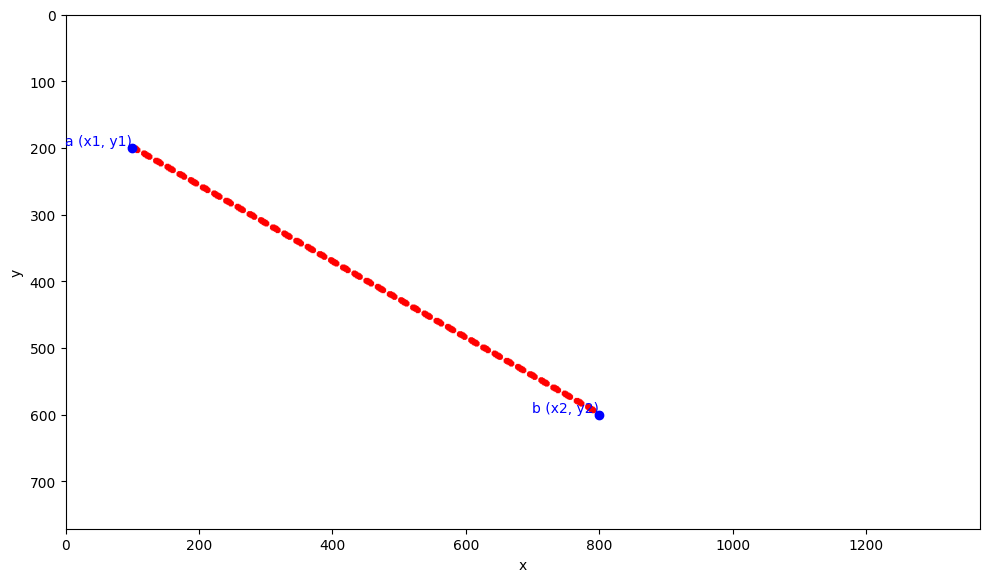

In [3]:
#LOW LEVEL CODING FOR CREATING POINTS
print("\033c") #To close all
import numpy as np
import matplotlib.pyplot as plt

#The user informs the coordinates of the two points for the line.
# Mengubah kode sebelumnya untuk mengikuti format gambar yang diunggah pengguna:
# - Garis putus-putus merah dengan titik ujung biru.
# - Garis koordinat (x dan y) harus ditampilkan.
# - Titik a dan b harus ditandai dengan warna biru.

# Kembali mengatur variabel yang dibutuhkan
x1, y1 = 100, 200
x2, y2 = 800, 600
lw = 10  # Lebar garis
hw = lw // 2  # Setengah lebar garis

# Ukuran kanvas
row = int(5/7 * 1080)
col = int(5/7 * 1920)

# Membuat kanvas putih
# First, we need to calculate the gradient 'my'
my = (y2 - y1) / (x2 - x1)

# Then we'll recreate the canvas
Gambar = np.ones(shape=(row, col, 3), dtype=np.uint8) * 255

# Fungsi untuk menggambar titik dengan warna tertentu
def draw_point(x, y, hw, Gambar, color):
    for i in range(max(0, x-hw), min(col, x+hw)):
        for j in range(max(0, y-hw), min(row, y+hw)):
            if ((i-x)**2 + (j-y)**2) < hw**2:
                Gambar[j, i] = color

# Redefine draw_dotted_line function to include my calculation inside
def draw_dotted_line(x1, y1, x2, y2, hw, Gambar, color, dash_length=20):
    my = (y2 - y1) / (x2 - x1)  # Gradient calculation
    dx = x2 - x1
    dy = y2 - y1
    dist = np.sqrt(dx**2 + dy**2)
    dashes = int(dist / dash_length)
    for dash in range(dashes):
        start = dash / dashes
        end = (dash + 0.5) / dashes
        x_start = int(x1 + start * dx)
        x_end = int(x1 + end * dx)
        y_start = int(y1 + start * dy)
        y_end = int(y1 + end * dy)
        for x in range(x_start, x_end):
            y = int(my * (x - x1) + y1)
            if 0 <= x < col and 0 <= y < row:  # Ensure that the points are within the canvas
                draw_point(x, y, hw, Gambar, color)

# Now draw everything again
draw_dotted_line(x1, y1, x2, y2, hw, Gambar, color=[255, 0, 0])
draw_point(x1, y1, hw, Gambar, color=[0, 0, 255])
draw_point(x2, y2, hw, Gambar, color=[0, 0, 255])

# Create a new plot with the sumbu koordinat
plt.figure(figsize=(10, 6))
plt.imshow(Gambar)
plt.xlim(0, col)
plt.ylim(row, 0)  # Flip the y-axis to match typical Cartesian coordinate system
plt.xlabel('x')
plt.ylabel('y')
plt.scatter([x1, x2], [y1, y2], c='blue')  # Mark points a and b
plt.text(x1, y1, 'a (x1, y1)', color='blue', verticalalignment='bottom', horizontalalignment='right')
plt.text(x2, y2, 'b (x2, y2)', color='blue', verticalalignment='bottom', horizontalalignment='right')
plt.tight_layout()
plt.show()

c


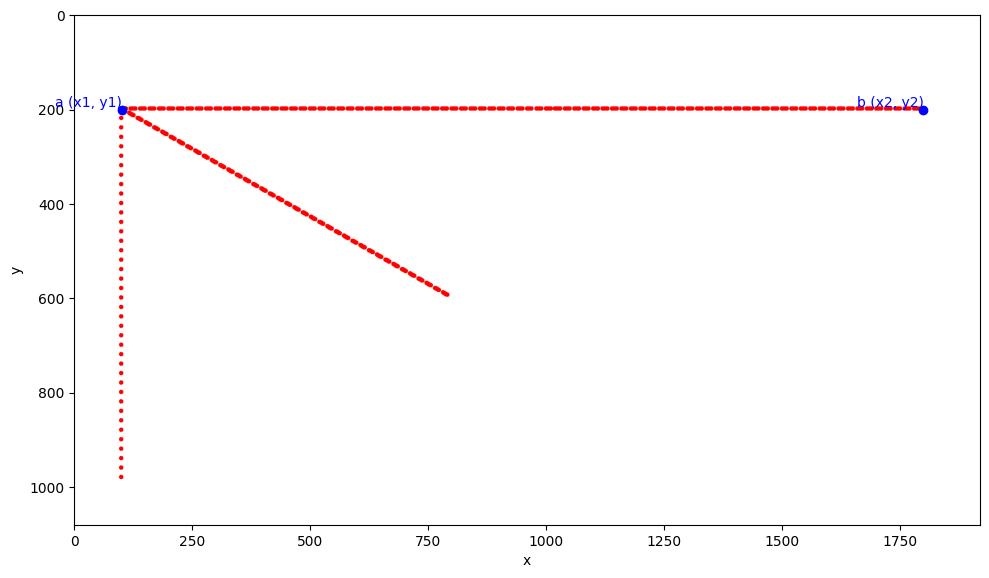

In [4]:
import numpy as np
import matplotlib.pyplot as plt

print("\033c") #To close all

# Variabel koordinat untuk garis-garis
x1, y1 = 100, 200
x2, y2 = 1800, 200
x3, y3 = 100, 1000
x4, y4 = 800, 600

# Lebar garis
lw = 10
hw = lw // 2

# Ukuran kanvas
row = int(1 * 1080)
col = int(1 * 1920)

# Membuat kanvas putih
Gambar = np.ones(shape=(row, col, 3), dtype=np.uint8) * 255

# Fungsi untuk menggambar titik dengan warna tertentu
def draw_point(x, y, hw, Gambar, color):
    for i in range(max(0, x-hw), min(col, x+hw)):
        for j in range(max(0, y-hw), min(row, y+hw)):
            if ((i-x)**2 + (j-y)**2) < hw**2:
                Gambar[j, i] = color

# Redefine draw_dotted_line function to include my calculation inside
def draw_dotted_line(x1, y1, x2, y2, hw, Gambar, color, dash_length=20):
    dx = x2 - x1
    dy = y2 - y1
    dist = np.sqrt(dx**2 + dy**2)
    dashes = int(dist / dash_length)
    for dash in range(dashes):
        start = dash / dashes
        end = (dash + 0.5) / dashes
        x_start = int(x1 + start * dx)
        x_end = int(x1 + end * dx)
        y_start = int(y1 + start * dy)
        y_end = int(y1 + end * dy)
        if x1 != x2:
            my = (y2 - y1) / (x2 - x1)
        else:
            my = float('inf')  # Gradien tak terhingga untuk garis vertikal
        for x in range(x_start, x_end + 1):
            if x1 != x2:  # Non-vertical line
                y = int(my * (x - x1) + y1)
            else:  # Vertical line
                y = int(y1 + start * dy)
            if 0 <= x < col and 0 <= y < row:
                draw_point(x, y, hw, Gambar, color)

# Draw all the lines
draw_dotted_line(x1, y1, x2, y2, hw, Gambar, color=[255, 0, 0])  # Horizontal line
draw_dotted_line(x1, y1, x3, y3, hw, Gambar, color=[255, 0, 0])  # Vertical line
draw_dotted_line(x1, y1, x4, y4, hw, Gambar, color=[255, 0, 0])  # Diagonal line
draw_point(x1, y1, hw, Gambar, color=[0, 0, 255])  # Point a
draw_point(x2, y2, hw, Gambar, color=[0, 0, 255])  # Point b

# Create a new plot with the axis
plt.figure(figsize=(10, 6))
plt.imshow(Gambar)
plt.xlim(0, col)
plt.ylim(row, 0)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter([x1, x2], [y1, y2], c='blue')
plt.text(x1, y1, 'a (x1, y1)', color='blue', verticalalignment='bottom', horizontalalignment='right')
plt.text(x2, y2, 'b (x2, y2)', color='blue', verticalalignment='bottom', horizontalalignment='right')
plt.tight_layout()
plt.show()